$$\require{mhchem}$$

# HW3 (due 9/26)

## Challenger Rocket O-ring Failures [40 pt]

![Challenger](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Challenger_explosion.jpg/296px-Challenger_explosion.jpg)


The space shuttle Challenger flew 9 missions from 1983-1986. On its final launch, Challenger exploded a bit more than 1 minute after launch. Among the astronauts on board was Judith Resnik, a CMU alum (ECE), for whom the Resnik award at CMU for exceptional senior women is named after, and Ronald McNair, the second African American to fly to space and for whom the national McNair scholars program is named after.

The Rogers commission was tasked with identifying the factors that led to the disaster, and notably Nobel-prize-winning physicist Richard Feynman was on the commission. The cause of the failure was eventually determined to be a failed O-ring that led to an explosion in the fuel tank, and the temperature on the day of the launch one of the primary considerations.

This was a particularly dark period for NASA and engineers as the Challenger incident exposed major issues around reliability and engineering statistics. The disaster was not just a technical failure in the O-ring, but a failure in the engineering organization at NASA.

`````{seealso}
* Feynman's special report is in the appendix to the Rogers commission report (Appendix F) https://www.govinfo.gov/content/pkg/GPO-CRPT-99hrpt1016/pdf/GPO-CRPT-99hrpt1016.pdf
* Mr Feynman Goes to Washington, available here: https://calteches.library.caltech.edu/3570/1/Feynman.pdf
* https://www.youtube.com/watch?v=ZOzoLdfWyKw (Feynman testimony starts at 1:53)
* https://www.cmu.edu/education-office/academic-resources/resnik-award.html
````

### Download the o-ring dataset from UC Irvine's website

Find the data file on the website (you want the O-ring erosion only one), download the data file using wget, and load it into pandas. 
https://archive.ics.uci.edu/ml/datasets/Challenger+USA+Space+Shuttle+O-Ring
`> wget https://archive.ics.uci.edu/ml/machine-learning-databases/space-shuttle/o-ring-erosion-only.data`

In [2]:
import pandas as pd

# Get columns from data website
columns = ['#rings at risk', '#rings with distress', 'T (F)', 'p (psi)', 'temporal order']
full_data = pd.read_csv('o-ring-erosion-only.data', sep=r"\s+", names=columns, engine='python')
full_data

,#rings at risk,#rings with distress,T (F),p (psi),temporal order
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


### Binary variable and plot 

Make a binary variable that represents whether the number of O-ring failures is greater than or equal to 1 (e.g. 0 if no failure, 1 if failure). Plot the binary variable as a function of the temperature.

/tmp/ipykernel_98/3525197699.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'Failure'] = np.where(data.loc[:,'Failure'] > 0, 1, 0)


0     66
1     70
2     69
3     68
4     67
5     72
6     73
7     70
8     57
9     63
10    70
11    78
12    67
13    53
14    67
15    75
16    70
17    81
18    76
19    79
20    75
21    76
22    58
Name: T, dtype: int64

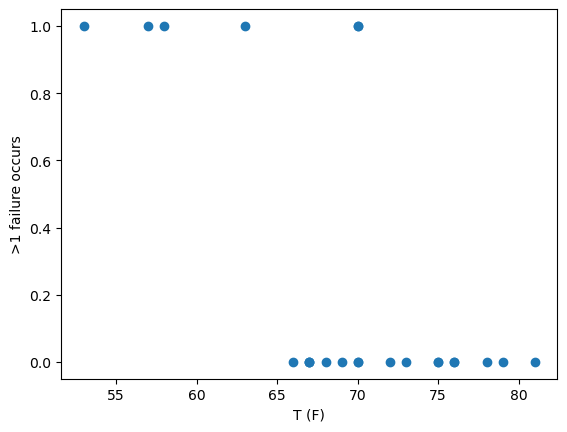

In [5]:
import matplotlib.pyplot as plt
import numpy as np

data = full_data[['T (F)','#rings with distress']] 
data.columns = ['T', 'Failure']
data.loc[:,'Failure'] = np.where(data.loc[:,'Failure'] > 0, 1, 0)

fig, ax = plt.subplots()
ax.scatter(data['T'].values, data['Failure'].values)
ax.set_xlabel('T (F)')
ax.set_ylabel('>1 failure occurs')
data['T']

### Train/test split

Make a simple train 80/20 train/test split using the available data. Don't use shuffle, so that this is effectively a time series split (e.g. first 80% of the launches is train, then last 20% is test).

In [6]:
from sklearn.model_selection import train_test_split


data_train, data_test = train_test_split(data, random_state=0, shuffle=False)

X_train, y_train = data_train['T'].values.reshape(-1,1), data_train['Failure'].values
X_test, y_test = data_test['T'].values.reshape(-1,1), data_test['Failure'].values


### Logistic regression

Fit a simple LogistRegression model to the data and evaluate the accuracy on the test set. Is it statistically significant with such a small dataset?

Plot whether a failure is predicted at all temperatures from 20F to 80F.

test accuracy: 1.000


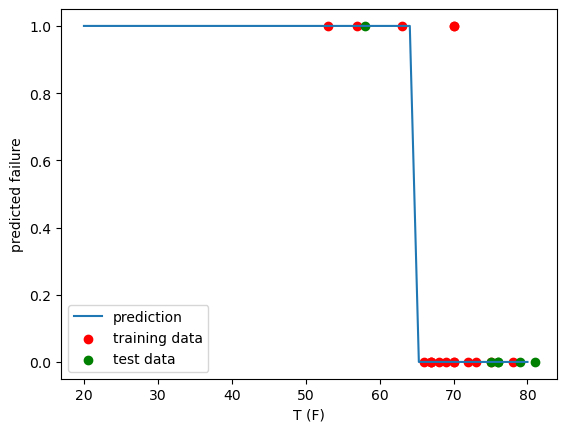

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="none")
)
lr.fit(X_train, y_train)

acc = lr.score(X_test, y_test)
print(f'test accuracy: {acc:.3f}')

Xp = np.linspace(20,80, 100).reshape(-1,1)
y_pred = lr.predict(Xp)

fig, ax = plt.subplots()
ax.plot(Xp, y_pred, label='prediction')
ax.scatter(X_train, y_train, c='r', label='training data')
ax.scatter(X_test, y_test, c='g', label='test data')
ax.set_xlabel('T (F)')
ax.set_ylabel('predicted failure')
ax.legend()

### Probability of failure

One of the helpful things about logistic regression is that you can make predictions for the probability of outcomes. Use the `predict_proba` method on your classifier to predict the probability of a failure at 32F. 

`````{seealso}
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
`````

In [8]:
p_fail = lr.predict_proba(np.array([32,]).reshape(-1,1))[0][1]
print(f'Predicted probability of failure at 32F: {p_fail:.5f}')

Predicted probability of failure at 32F: 0.99997


### Problem analysis 

Skim the "Mr. Feynman Goes to Washington" article or the wikipedia article and answer the following questions with a few sentences each
* What was the primary chemical engineering / material cause for O-ring failures at low temperatures?
* What factors led to such large disparities in risk assessment for the launch (they ranged from near certainty, to 1-in-100, to 1-in-100,000 odds of a catastrophic failure). 


The low temperatures before and during the launch reduced the elasticity of the rubber O-rings, which caused them to not seal the field joints as intended. Thus, hot gas escaped from the booster and burned, damaging the connector holding it in place. As the booster rotated, the propellant tank collapsed and exploded.

Feynmann attributes the large disparities in risk assessment largely to insufficient communication between management and engineers. Repeated lowering of safety criteria by management causes the engineers to loose confidence in the safety of their machines.


## Perovskite classification and discovery [60 pt]


![NREL PV chart](https://www.nrel.gov/pv/assets/images/best-research-cell-efficiencies-thumbnail-rev220630.jpg)
https://www.nrel.gov/pv/cell-efficiency.html/

Perovskites are a special type of inorganic crystal that are now one of the most efficient and popular research materials for photovoltaics, as shown in the chart above!

Perovskite refers to a specific material ($\ce{CaTiO3}$). There are many substitutions that you can make for Ca and Ti of the form $\ce{ABX3}$ that may be stable in the same crystal structure; some will be stable in the perovskite structure, and some will not be. 
* A is a replacement for Ca, usually a transition metal
* B is a replacement for Ti, usually a transition metal
* X is a replacement for Cl, often O, S, Se, F, Cl, Br, I

One factor (but not the only one) is that the radii of the two elements need to be similar to the original Ca/Ti ratio. For example, one proposed factor (commonly referred to as the Goldschmidt tolerance factor $t$) is:
\begin{align*}
t=\frac{R_A+R_X}{\sqrt{2}(R_B+R_X)}
\end{align*}
where $R_A$ is the radius of element A, $R_B$ is the radius of element $B$, and $R_X$ is the radius of element X (the units don't matter as long as you are consistent with all three!). If $t$ is between 0.75 and 1.0, the combination is often stable in the perovskite structure.

One way to identify whether a particular combination of elements A, B and X is stable is to do a quantum chemistry simulation like the guest speakers last week discussed. This often works but is not perfectly accurate
`````{seealso}
* https://en.wikipedia.org/wiki/Perovskite
* https://en.wikipedia.org/wiki/Perovskite_(structure)
`````

I want your help to identify some polynomial features that correlate with whether a particular combination will form a perovskite!

## Download the dataset and load with pandas

You can find an experimental dataset for whether the perovskite structure is stable for 576 A/B/X compounds here: 
https://github.com/CJBartel/perovskite-stability

Download the file Table1.csv using `wget` and use pandas to load as a dataframe. 

`````{note}
The url for the "raw" file in github is one that you can use with wget.
`````
`> wget https://raw.githubusercontent.com/CJBartel/perovskite-stability/master/TableS1.csv`

In [1]:
import pandas as pd
data = pd.read_csv('TableS1.csv')
data = data.rename({'rA (Ang)': 'rA', 'rB (Ang)': 'rB', 'rX (Ang)': 'rX'}, axis=1)
data.head()

,ABX3,exp_label,is_train,A,B,X,nA,nB,nX,rA,rB,rX,t,tau,t_pred,tau_pred,tau_prob
0,AgBrO3,-1.0,1,Ag,Br,O,1,5,-2,1.28,0.31,1.40,1.11,6.43,-1,-1,0.05
1,AgCdBr3,-1.0,1,Ag,Cd,Br,1,2,-1,1.28,0.95,1.96,0.79,5.58,-1,-1,0.12
2,PbAgBr3,-1.0,1,Pb,Ag,Br,2,1,-1,1.49,1.15,1.96,0.78,7.71,-1,-1,0.01
3,AgCaCl3,-1.0,1,Ag,Ca,Cl,1,2,-1,1.28,1.00,1.81,0.78,6.00,-1,-1,0.07
4,AgClO3,-1.0,1,Ag,Cl,O,1,5,-2,1.28,0.12,1.40,1.25,15.17,-1,-1,0.00


## Train/val/test split

Split the data into a random 90/10 train/validation (90) and test (10) split using sklearn. The label we want to predict (y) is "exp_label". Allowed features for X are the columns [A,B,X,nA,nB,nX,rA (Ang),rB (Ang),rX (Ang)]

In [2]:
from sklearn.model_selection import train_test_split
target = ['exp_label']
# Drop categorical features
features = ['nA','nB','nX','rA','rB','rX']
data_train, data_test = train_test_split(data, test_size=0.1, random_state=0)
data_train, data_val = train_test_split(data_train, test_size=0.1, random_state=0)
X_train, y_train = data_train[features], data_train[target]
X_val, y_val = data_val[features], data_val[target]
X_test, y_test = data_test[features], data_test[target]
X_train

,nA,nB,nX,rA,rB,rX
406,1,5,-2,1.39,0.76,1.40
269,3,3,-2,1.12,0.64,1.40
419,1,5,-2,1.72,0.38,1.40
313,3,3,-2,1.11,0.62,1.40
367,1,5,-2,1.64,0.54,1.40
...,...,...,...,...,...,...
420,1,5,-2,1.72,0.78,1.40
133,2,4,-2,1.34,0.78,1.40
103,1,2,-1,1.88,0.83,1.96
16,1,5,-2,1.28,0.38,1.40


## Visualize the Goldschmidt ratio

Plot a histogram for the t-values in the data set. Highlight the desired range of 0.75-1.00. Color code the histogram based on the "exp_label" (Hint: This should look similar to Fig. 2A in the paper that the data was generated for).

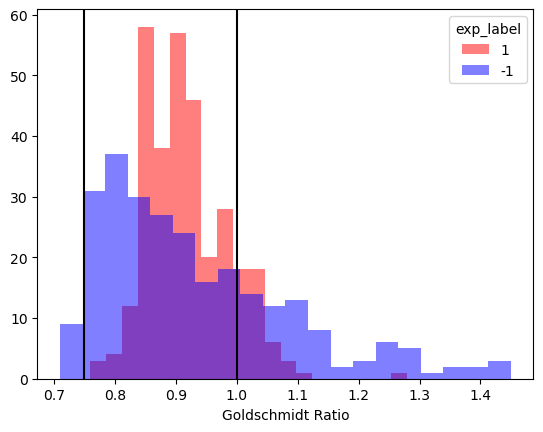

In [3]:
import matplotlib.pyplot as plt
import numpy as np

t_data_1 = data[data['exp_label'] == 1]['t']
t_data_2 = data[data['exp_label'] == -1]['t']

fig, ax = plt.subplots()
ax.hist(t_data_1, bins=20, color='r', label='1', alpha=0.5)
ax.hist(t_data_2, bins=20, color='b', label='-1', alpha=0.5)
ax.set_xlabel("Goldschmidt Ratio")
ax.axvline(0.75, color='k')
ax.axvline(1.00, color='k')
ax.legend(title='exp_label')

Define a simple 'Goldschmidt classifier', which uses the t-ratio to predict 'exp_label'. What is its accuracy on the full data set? Is this significantly better than a naive classifier?

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n = data.shape[0]
pred_g = - np.ones(n)
pred_g[(data['t'] < 1.) & (data['t'] > 0.75)] = 1
acc_g = np.sum(pred_g == data['exp_label'])/n
print(f'Accuracy of Goldschmidt classifier on full data set: {acc_g:.5f}')

naive_pred = data['exp_label'].mode().values * np.ones(n)
acc_naive = np.sum(naive_pred == data['exp_label'])/n
print(f'Accuracy of naive classifier on full data set: {acc_naive:.5f}')

# Alternatively, use t as input to Logistic Regression and record test set acccuracy
lr_t = make_pipeline(StandardScaler(), LogisticRegression(penalty="none"))
lr_t.fit(data_train['t'].values.reshape(-1,1), data_train['exp_label'].values.ravel())
acc_lr_test = lr_t.score(data_test['t'].values.reshape(-1,1), data_test['exp_label'].values.ravel())
print(f'Test accuracy using LogReg with t feature: {acc_lr_test:.5f}')                         

Accuracy of Goldschmidt classifier on full data set: 0.61458
Accuracy of naive classifier on full data set: 0.54340
Test accuracy using LogReg with t feature: 0.67241


## Logistic regression

Using the columns above, fit a logistic regression model using the available features. Report the accuracy and compare it to the Goldschmidt ratio. 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def print_scores(method):
    acc_train = method.score(X_train.values, y_train.values.ravel())
    acc_val = method.score(X_val.values, y_val.values.ravel())
    acc_test = method.score(X_test.values, y_test.values.ravel())
    print(f'Train Score: {acc_train:.7f}')
    print(f'Val Score: {acc_val:.7f}')
    print(f'Test Score: {acc_test:.7f}')
    
    
lr = make_pipeline(StandardScaler(), LogisticRegression(penalty="none"))

lr.fit(X_train.values, y_train.values.ravel())

print_scores(lr)


Train Score: 0.8090129
Val Score: 0.7692308
Test Score: 0.8448276


## Add features
First, add some features to the input matrix X: 1/R_A, 1/R_B Then add polynomial features (varying the polynomial features degrees from 1 to 3). 

Like we did in class in the features lecture, vary the polynomial powers from 1-3 and study the effect on the train and validation accuracy. Which one is the most predictive for your train/validation split?

In [138]:
from sklearn.preprocessing import PolynomialFeatures

# add reciprocal features
def add_features(X):
    X = X.assign(rA_inv= lambda x:  1 / x.rA)
    X = X.assign(rB_inv= lambda x:  1 / x.rB)
    X = X.assign(rX_inv= lambda x:  1 / x.rX)
    return X

X_train = add_features(X_train)
X_val = add_features(X_val)
X_test = add_features(X_test)

# fit models of varying polynomial degree
for p in [1, 2, 3]:
    print(f"Degree {p:.0f}") 
    lr_pol = make_pipeline(StandardScaler(), PolynomialFeatures(degree=p), LogisticRegression(penalty="none", solver='lbfgs'))
    lr_pol.fit(X_train.values, y_train.values.ravel())
    print_scores(lr_pol)

Degree 1
Train Score: 0.8562232
Val Score: 0.8269231
Test Score: 0.8793103
Degree 2
Train Score: 0.9291845
Val Score: 0.9230769
Test Score: 0.9482759
Degree 3
Train Score: 0.9506438
Val Score: 0.9038462
Test Score: 0.9310345


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

## Regularization

Try varying the type of regularization ("penalty"), and the strength of the regularization ("C") in LogisticRegression. For the highest validation set accuracy you can find, fit the model to the entire train+validation dataset and predict on the test set to report your final model accuracy.

In [139]:

# L1 Regularization
for c in [0.001, .1, 1, 10e5]:
    print(f"L1, C = {c:.2f}") 
    lr_pol = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LogisticRegression(penalty="l1", C=c, solver='saga'))
    lr_pol.fit(X_train.values, y_train.values.ravel())
    print_scores(lr_pol)
    
# L2 Regularization  
for c in [0.001, .1, 1, 10e5]:
    print(f"L2, C = {c:.2f}") 
    lr_pol = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LogisticRegression(penalty="l2", C=c, solver='saga'))
    lr_pol.fit(X_train.values, y_train.values.ravel())
    print_scores(lr_pol)

L1, C = 0.00
Train Score: 0.5493562
Val Score: 0.4230769
Test Score: 0.6034483
L1, C = 0.10
Train Score: 0.8819742
Val Score: 0.8461538
Test Score: 0.9482759
L1, C = 1.00
Train Score: 0.9077253
Val Score: 0.8846154
Test Score: 0.9655172
L1, C = 1000000.00
Train Score: 0.9163090
Val Score: 0.8846154
Test Score: 0.9655172
L2, C = 0.00
Train Score: 0.7703863
Val Score: 0.7307692
Test Score: 0.8448276
L2, C = 0.10


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

Train Score: 0.9012876
Val Score: 0.8653846
Test Score: 0.9655172
L2, C = 1.00
Train Score: 0.9098712
Val Score: 0.8846154
Test Score: 0.9655172
L2, C = 1000000.00
Train Score: 0.9163090
Val Score: 0.8846154
Test Score: 0.9655172


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [140]:
Xf = pd.concat([X_train, X_val], axis=0)
yf = pd.concat([y_train, y_val], axis=0)
Xf
lr_pol = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LogisticRegression(penalty="l2", C=1, solver='saga'))
lr_pol.fit(Xf.values, yf.values.ravel())
print_scores(lr_pol)

Train Score: 0.9077253
Val Score: 0.8846154
Test Score: 0.9655172


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Bonus 

This problem is based on a paper that used a special method (SISSO) to generate and screen billions of possible algebraic formulae to see which ones correlated the best with perovskite structure. If you're interested the code for that is here: https://github.com/rouyang2017/SISSO

Read the paper to find the tolerance factor $\tau$, and use it as a single logistic regression feature. How accurate is your model compared to $\tau$ on your test set? How do your results compare to what the paper claims for accuracy?

The accuracy achieved on test set are close to the one reported in the paper (89% to 91%). This is much better accuracy than the one achieved by just using $t$.

In [141]:
X_tau_train = data_train['tau']
X_tau_val = data_val['tau']
X_tau_test = data_test['tau']
lr_tau = make_pipeline(StandardScaler(), LogisticRegression(penalty="l2", C=1, solver='saga'))
lr_tau.fit(X_tau_train.values.reshape(-1,1), y_train.values.ravel())
acc_train = lr_tau.score(X_tau_train.values.reshape(-1,1), y_train.values.ravel())
acc_val = lr_tau.score(X_tau_val.values.reshape(-1,1), y_val.values.ravel())
acc_test = lr_tau.score(X_tau_test.values.reshape(-1,1), y_test.values.ravel())
print(f'Train Score: {acc_train:.7f}')
print(f'Val Score: {acc_val:.7f}')
print(f'Test Score: {acc_test:.7f}')

Train Score: 0.8669528
Val Score: 0.9423077
Test Score: 0.8965517


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
